# Global Network Linearity-based Weighting

In [ ]:
# Created on Thu Dec 09 2021 6:24:10 AM
# Author: Ashwin De Silva (ldesilv2@jhu.edu)

Let's consider a neural network with $n$ layers. The output of the $i$-th layer corresponding to an input $X$ is given by, 

$$ A_i = \sigma ( \dots \sigma(\sigma( X W_1 + b_1 )W_2 + b_2) \dots )W_i + b_i) $$

Let $\mathcal{P}$ be a convex polytope in the input space encoded by the ReLU activation pattern $M_{\mathcal{P}} = [ m_{\mathcal{P}, 1}, m_{\mathcal{P}, 2}, \dots, m_{\mathcal{P}, n}]$, where $m_{\mathcal{P}, i}$ is a binary vector with dimensionality equal to the number of nodes in layer $i$, with non-zeros indicating which nodes were activated by the samples within $\mathcal{P}$. 

Let $X_{\mathcal{P}}$ be a batch of samples that belongs to the convex polytope $\mathcal{P}$. All the samples in $X_{\mathcal{P}}$ result in the ReLU activation pattern $m_{\mathcal{P}, 1}$ in the first layer. Therefore, instead of using ReLU, we could zero out columns of the weight matrix $W_1$ (and the bias $b_1$) that correspond to the inactive nodes of the layer and have have a linear system

$$ A_{\mathcal{P}, 1} = (X_{\mathcal{P}} W_1 + b_1) \text{diag}(m_{\mathcal{P}, 1}) = X_{\mathcal{P}} W_1  \text{diag}(m_{\mathcal{P}, 1}) + b_1 \text{diag}(m_{\mathcal{P}, 1})$$

Letting $\Omega_{\mathcal{P}, 1} = W_1  \text{diag}(m_{\mathcal{P}, 1}) $ and $ \beta_{\mathcal{P}, 1} = b_1 \text{diag}(m_{\mathcal{P}, 1}) $ we get,  

$$ A_{\mathcal{P}, 1} = X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1} $$

Thus, we can say that the output of the first layer is linear with respect to the input. In other words, $ \sigma (X_{\mathcal{P}} W_1 + b_1) = X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1} $.

Similary, we can obtain an expression for $A_{\mathcal{P}, 2}$.

$$ A_{\mathcal{P}, 2} = ((X_{\mathcal{P}} \Omega_{\mathcal{P}, 1} + \beta_{\mathcal{P}, 1})W_2 + b_2) \text{diag}(m_{\mathcal{P}, 2}) = X_{\mathcal{P}} \Omega_{\mathcal{P}, 2} + \beta_{\mathcal{P}, 2}$$ 

where, 
    $$ \Omega_{\mathcal{P}, 2} = \Omega_{\mathcal{P}, 1} W_2 \text{diag}(m_{\mathcal{P}, 2}) $$ 
    $$ \beta_{\mathcal{P}, 2} = \beta_{\mathcal{P}, 1} W_2 \text{diag}(m_{\mathcal{P}, 2}) + b_2  \text{diag}(m_{\mathcal{P}, 2}) $$

Extending this notion further, we can obtain an expression for the $i$-th layer.

$$ A_{\mathcal{P}, i} = X_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i} $$

where, 
    $$ \Omega_{\mathcal{P}, i} = \Omega_{\mathcal{P}, i-1} W_i \text{diag}(m_{\mathcal{P}, i}) $$ 
    $$ \beta_{\mathcal{P}, i} = \beta_{\mathcal{P}, i-1} W_i \text{diag}(m_{\mathcal{P}, i}) + b_i \text{diag}(m_{\mathcal{P}, i}) $$

Therefore, we can observe that the output of each layer $i$ is linear with respect to the inputs from the same polytope $\mathcal{P}$, i.e. $ \sigma ( \dots \sigma(\sigma( X W_1 + b_1 )W_2 + b_2) \dots )W_i + b_i) = \sigma( (X_{\mathcal{P}} \Omega_{\mathcal{P}, i-1} + \beta_{\mathcal{P}, i-1}) W_i + b_i )   = X_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i} $. The collections $\{ \Omega_i \}_{i=1}^{n}$ and $\{ \beta_i \}_{i=1}^{n}$ can be thought of as the weights of a sub-sampled network specific for the polytope $\mathcal{P}$ (say, $\mathcal{P}$-network) in which the layers behaves linearly for the input samples from $\mathcal{P}$.

Let $\mathcal{Q}$ be another convex polytope (different from $\mathcal{P}$) in the same input space and let $X_{\mathcal{Q}} $ be a batch of samples that belongs to the convex polytope $\mathcal{Q}$. We make the following assumptions regarding $X_{\mathcal{Q}} $ and $\mathcal{P}$-network.

* If $X_{\mathcal{Q}} \subset X_{\mathcal{P}}$, then the layers of $\mathcal{P}$-network behaves linearly with respect to the inputs $X_{\mathcal{Q}}$.

* If $P$ and $Q$ are in close proximity (samples in $Q$ have a high possibility of ending up in $P$), then the layers of $\mathcal{P}$-network behaves approximately linearly with respect to the inputs $X_{\mathcal{Q}}$.

* If $P$ and $Q$ are distant (samples in $Q$ have a low possibility of ending up in $P$), then the layers of $\mathcal{P}$-network does not behave linearly with respect to the inputs $X_{\mathcal{Q}}$.

In the light of these assumptions, we hypothesize that the degree of linearity exhibited by the $\mathcal{P}$-network with respect to $X_{\mathcal{Q}}$ in a sense reflects the similarity between the polytopes $\mathcal{P}$ and $\mathcal{Q}$. The higher the linearity, the more closely $\mathcal{P}$ and $\mathcal{Q}$ are related to each other.

To quantify the linearity of layer $i$ of the $\mathcal{P}$-network w.r.t $\mathcal{Q}$, we compare the nodes of layer $i$ of the $\mathcal{P}$-network that are activated by an input sample $x_{\mathcal{P}}$ from $\mathcal{P}$ and input sample $x_{\mathcal{Q}}$ from $\mathcal{Q}$. Let support $m = \text{supp}(a)$, be a binary 0/1 vector where $m_j = 1$ where $a_j > 0$. Then, 

$$ m_{\mathcal{P}, i} (x_\mathcal{Q}) = \text{supp}( \sigma( (x_{\mathcal{Q}} \Omega_{\mathcal{P}, i-1} + \beta_{\mathcal{P}, i-1}) W_i + b_i ) ) $$ 

$$ m_{\mathcal{P}, i} (x_\mathcal{P}) = \text{supp}( x_{\mathcal{P}} \Omega_{\mathcal{P}, i} + \beta_{\mathcal{P}, i}) $$

Here, we make the observation that $ m_{\mathcal{P}, i} (x_\mathcal{P}) = m_{\mathcal{P}, i}$. By aggregating the node activation patterns across all the layers, we obtain 

$$ M_{\mathcal{P}}(x_\mathcal{Q}) = [ m_{\mathcal{P}, 1} (x_\mathcal{Q}), m_{\mathcal{P}, 2} (x_\mathcal{Q}), \dots, m_{\mathcal{P}, n} (x_\mathcal{Q})] $$

$$ M_{\mathcal{P}}(x_\mathcal{P}) = [ m_{\mathcal{P}, 1}, m_{\mathcal{P}, 2}, \dots, m_{\mathcal{P}, n}]$$ 

Here, it's clear that $M_{\mathcal{P}}(x_\mathcal{P}) = M_{\mathcal{P}}$ which is the ReLU activation pattern of the polytope $\mathcal{P}$. Finally, we define the following measure,

$$ w_{\mathcal{P}}(\mathcal{Q}) = \exp ( - c \Vert M_{\mathcal{P}}(x_\mathcal{Q}) - M_{\mathcal{P}} \Vert_1) $$

where $c$ is a tuning parameter (set to 1 by default). We hypothesize that $w_{\mathcal{P}}(\mathcal{Q}) \in (0, 1]$ measures the global linearity of the $\mathcal{P}$-network w.r.t to an input from the polytope $\mathcal{Q}$. The higher the $w_{\mathcal{P}}(\mathcal{Q})$, the more closely related $\mathcal{P}$ and $\mathcal{Q}$ are. $w_{\mathcal{P}}(\mathcal{Q}) = 1$ when $\mathcal{Q} \subset \mathcal{P}$. Thus $w_{\mathcal{P}}(\mathcal{Q})$ emerges as a candiate to weight polytopes during the training of kernel density networks.

The remainder of this notebook is organized as follows. 

1. We compute the global network linearity-based weights for selected polytopes induced by ReLU MLPs trained on G-XOR and Spiral Dataset
2. We demonstrate the applicability of the proposed weighting scheme in the KDN through the spiral and gaussian sparse parity datasets.

Certain ideas behind the weighting scheme was inspired by Collins et al. [1]

## 2. Experiments

### 2.1 G-XOR Dataset

This section walks you through an experiment involving the Gaussian XOR dataset.

In [34]:
# import standard modules
import sys
sys.path.insert(1, '../kdg/docs/tutorials')
import numpy as np
from tensorflow.keras import layers
from kdg.kdn import *
from kdg.utils import generate_gaussian_parity
import pandas as pd
import seaborn as sns
sns.set_context("talk")
import matplotlib.pyplot as plt

# import external modules
from functions.global_linearity_based_weighting_support_functions import unit_step, get_activation_pattern, get_polytope_memberships

Let's begin by creating the train, test, and validation data.

In [49]:
# generate training data
X, y = generate_gaussian_parity(10000)

# generate validation data
X_val, y_val = generate_gaussian_parity(500)

# generate validation data
X_test, y_test = generate_gaussian_parity(1000)

Next, we define a simple (5, 5, 2) multi-layer perceptron and train it on the dataset we created earlier. We monitor the validation loss to avoid overfitting (this is an important step to ensure that the model learns better parititions (polytopes) of the input space)

In [51]:
# NN params
compile_kwargs = {
    "loss": "binary_crossentropy",
    "optimizer": keras.optimizers.Adam(1e-3)
    }
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=True)
fit_kwargs = {
    "epochs": 200,
    "batch_size": 32,
    "verbose": False,
    "validation_data": (X_val, keras.utils.to_categorical(y_val)),
    "callbacks": [callback]
    }

# network architecture
def getNN():
    network = keras.Sequential()
    network.add(layers.Dense(5, activation='relu', input_shape=(2,)))
    network.add(layers.Dense(5, activation='relu'))
    network.add(layers.Dense(units=2, activation = 'softmax'))
    network.compile(**compile_kwargs)
    return network

In [52]:
# train NN
nn = getNN()
history = nn.fit(X, keras.utils.to_categorical(y), **fit_kwargs)

Epoch 00045: early stopping


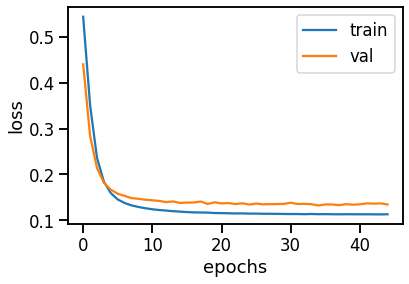

In [53]:
# plot the training loss and validation loss 
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])

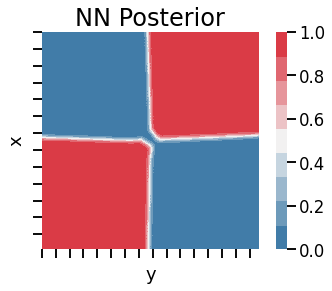

In [54]:
# plot the NN posterior
p = np.arange(-2, 2, step=0.005)
q = np.arange(-2, 2, step=0.005)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1) 
    
proba_nn = nn.predict(grid_samples)

data_nn = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_nn[:,0]})
data_nn = data_nn.pivot(index='x', columns='y', values='z')

sns.set_context("talk")
fig, ax = plt.subplots()
cmap= sns.diverging_palette(240, 10, n=9)

sns.heatmap(data_nn, ax=ax, vmin=0, vmax=1,cmap=cmap)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('NN Posterior',fontsize=24)
ax.set_aspect('equal')

In [56]:
# get the weights and biases of the trained MLP
weights = {}
biases = {}
for i in range(len(nn.layers)):
    weight, bias = nn.layers[i].get_weights()
    weights[i], biases[i] = weight, bias.reshape(1, -1)

For the purpose of visualizing how the computed weights reflect the neighbor polytopes of a given polytope, we pick some polytopes based on the number of samples they contain.

In [57]:
# select polytopes with more than 50 samples in class 1
label = 1
network_shape = [5, 5, 2]
X_ = X[y==label]
polytope_ids = get_polytope_memberships(X_, nn)[0]
polytope_patterns = []
for i in polytope_ids:
    polytope_patterns.append(get_activation_pattern(i, network_shape))
polytope_patterns = np.array(polytope_patterns)

selected_polytopes = []
for i in np.unique(polytope_ids):
    if np.sum(polytope_ids == i) > 50:
        selected_polytopes.append(i)

print("Selected Polytopes : ", selected_polytopes)

Selected Polytopes :  [332, 364, 380, 382, 383, 515, 531, 539, 547, 555, 571, 575]


The following code snippet implements the global network linearity based weight computation.

In [58]:
# computing weights based on global network linearity
def compute_weights(X_, polytope_id, c, network_shape, weights, biases):
    M_ref = get_activation_pattern(polytope_id, network_shape)
    M = np.empty((X_.shape[0], 0))
    start = 0
    for l in range(len(network_shape)-1):
        if l == 0:
            W = weights[l]
            B = biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
        else:
            end = start + network_shape[l-1]
            M_l = M_ref[start:end]
            start = end
            W = W @ np.diag(M_l) @ weights[l]
            B = B @ np.diag(M_l) @ weights[l] + biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
    
    return np.exp(-c * np.linalg.norm(M - M_ref, axis=1, ord=1))

Now we can visualize how the weights we compute can reflect the neighbor polytopes of a given polytope belonging to class 1. In the figures generated below, several selected polytopes (marked in black) and their neighboring polytopes (shaded in purple hues according to global network linearity-based weights) are illustrated. The selected polytope has a weight value of 1 while the neighbors have reducing weights as they move away from the selected polytope.

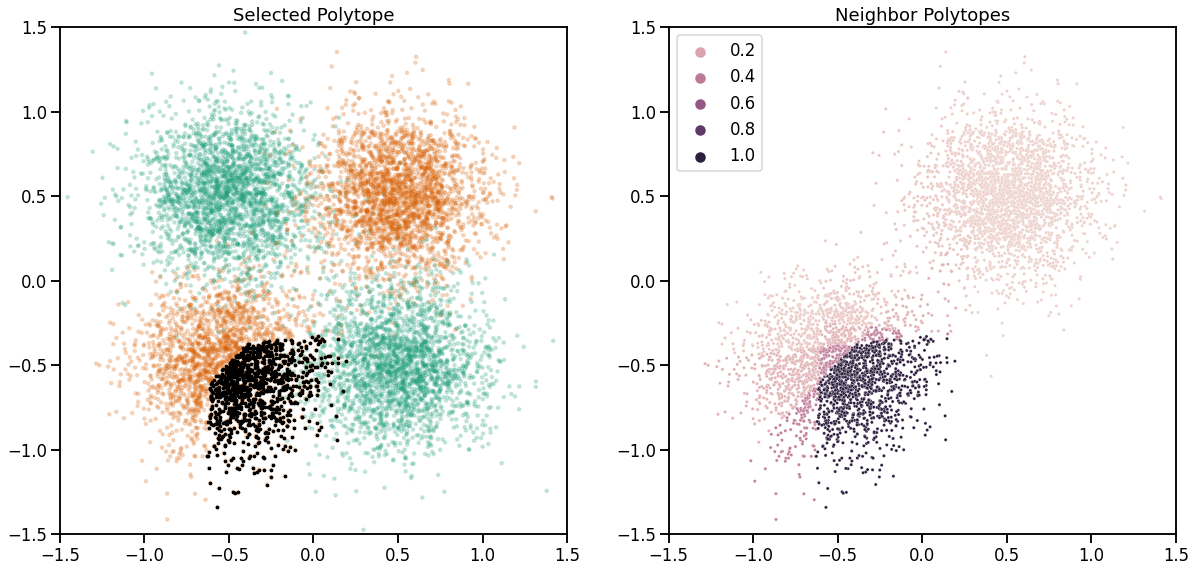

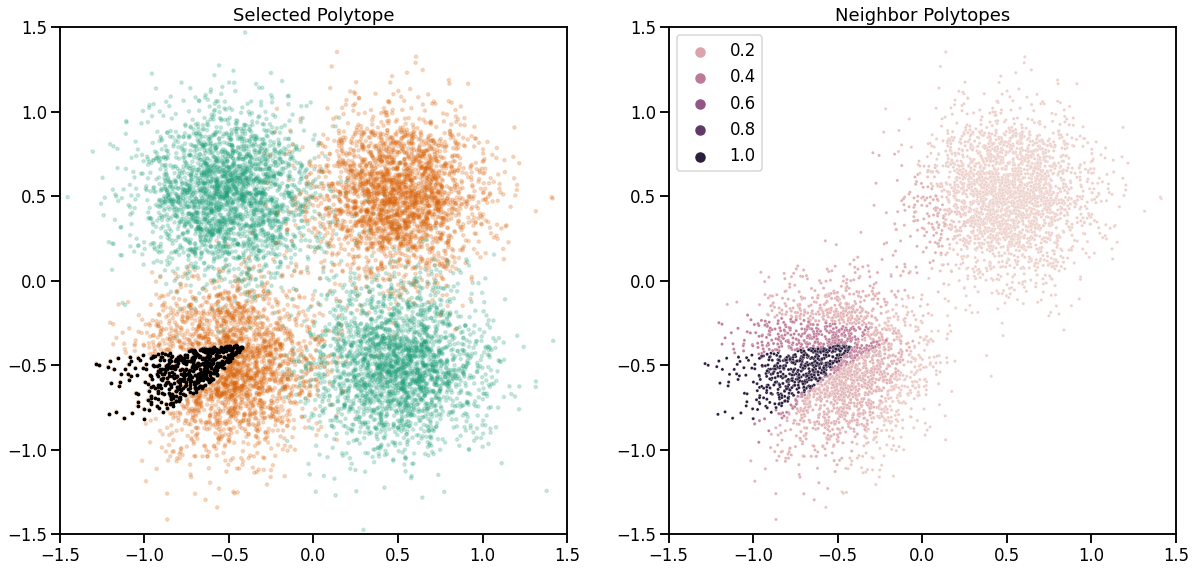

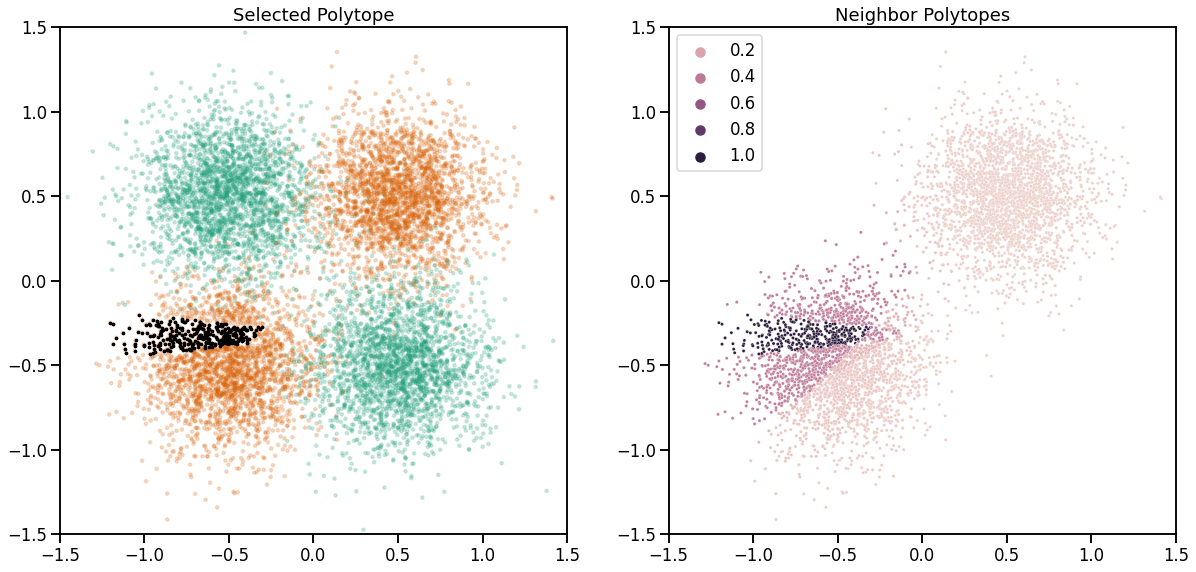

In [66]:
for polytope_id in selected_polytopes[1:4]:
    P_ = X_[polytope_ids == polytope_id]
    scales = compute_weights(X_, polytope_id, 1, network_shape, weights, biases)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 20))

    colors = sns.color_palette("Dark2", n_colors=2)
    clr = [colors[i] for i in y]
    ax[0].scatter(X[:, 0], X[:, 1], c=clr, s=10, alpha=0.2)
    ax[0].scatter(P_[:, 0], P_[:, 1], c='k', s=5, alpha=1)
    ax[0].set_xlim([-1.5, 1.5])
    ax[0].set_ylim([-1.5, 1.5])
    ax[0].set_aspect('equal')
    ax[0].set_title('Selected Polytope')

    sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=scales, ax=ax[1], s=10)
    ax[1].set_xlim([-1.5, 1.5])
    ax[1].set_ylim([-1.5, 1.5])
    ax[1].legend()
    ax[1].set_aspect('equal')
    ax[1].set_title('Neighbor Polytopes')

### 2.2 Spiral Dataset

In this section, we repeat the same steps in section 2.1 for the spiral dataset.

In [19]:
from kdg.utils import generate_spirals

Let's begin by creating the train, test, and validation data.

In [20]:
# create training, validation, and testing data
X, y = generate_spirals(10000, noise=.8, n_class=2)

X_val, y_val = generate_spirals(500, noise=.8, n_class=2)

X_test, y_test = generate_spirals(1000, noise=.8, n_class=2)

In [21]:
# Define NN parameters
compile_kwargs = {
    "loss": "binary_crossentropy",
    "optimizer": keras.optimizers.Adam(3e-4)
    }
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=True)
fit_kwargs = {
    "epochs": 300,
    "batch_size": 32,
    "verbose": False,
    "validation_data": (X_val, keras.utils.to_categorical(y_val)),
    "callbacks": [callback]
    }

We define a [10, 10, 10, 5, 2] network for this problem as the network should learn complex decision boundaries to tackle this problem.

In [22]:
# define the network architecture
def getNN():
    network_base = keras.Sequential()
    network_base.add(layers.Dense(10, activation='relu', input_shape=(2,)))
    network_base.add(layers.Dense(10, activation='relu'))
    network_base.add(layers.Dense(10, activation='relu'))
    network_base.add(layers.Dense(5, activation='relu'))
    network_base.add(layers.Dense(units=2, activation = 'softmax'))
    network_base.compile(**compile_kwargs)
    return network_base

In [23]:
# train Vanilla NN
nn = getNN()
history = nn.fit(X, keras.utils.to_categorical(y), **fit_kwargs)

Epoch 00165: early stopping


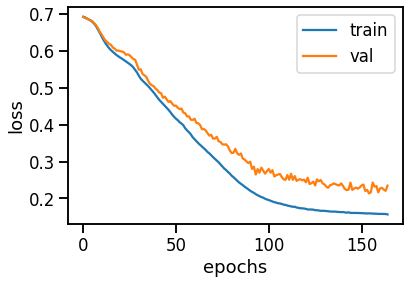

In [24]:
# plot the training loss and validation loss 
fig, ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend(['train', 'val'])

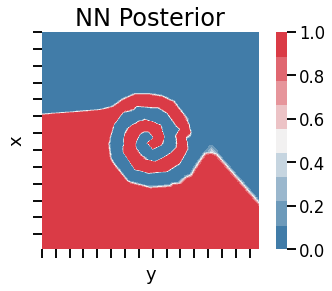

In [25]:
# plot the NN posterior
p = np.arange(-2, 2, step=0.005)
q = np.arange(-2, 2, step=0.005)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1) 
    
proba_nn = nn.predict(grid_samples)

data_nn = pd.DataFrame(data={'x':grid_samples[:,0], 'y':grid_samples[:,1], 'z':proba_nn[:,0]})
data_nn = data_nn.pivot(index='x', columns='y', values='z')

sns.set_context("talk")
fig, ax = plt.subplots()
cmap= sns.diverging_palette(240, 10, n=9)

sns.heatmap(data_nn, ax=ax, vmin=0, vmax=1,cmap=cmap)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('NN Posterior',fontsize=24)
ax.set_aspect('equal')

In [26]:
# get the weights and biases of the trained MLP
weights = {}
biases = {}
for i in range(len(nn.layers)):
    weight, bias = nn.layers[i].get_weights()
    weights[i], biases[i] = weight, bias.reshape(1, -1)

In [27]:
# select polytopes with more than 50 samples in class 1
label = 1
network_shape = [10, 10, 10, 5, 2]
X_ = X[y==label]
polytope_ids = get_polytope_memberships(X_, nn)[0]
polytope_patterns = []
for i in polytope_ids:
    polytope_patterns.append(get_activation_pattern(i, network_shape))
polytope_patterns = np.array(polytope_patterns)

selected_polytopes = []
for i in np.unique(polytope_ids):
    if np.sum(polytope_ids == i) > 50:
        selected_polytopes.append(i)

print("Selected Polytopes : ", selected_polytopes)

Selected Polytopes :  [13197159689, 13197159753, 13201354057, 13212573124, 13212573508, 13335113032, 13481008964, 13668143593, 13668143597, 13684854953, 13684857257, 19990226706, 19990242066, 19990242134, 19990246214, 19990565700, 19992662980, 20262611257, 20262615353]


In [28]:
# computing weights based on global network linearity
def compute_weights(X_, polytope_id, c, network_shape, weights, biases):
    M_ref = get_activation_pattern(polytope_id, network_shape)
    M = np.empty((X_.shape[0], 0))
    start = 0
    for l in range(len(network_shape)-1):
        if l == 0:
            W = weights[l]
            B = biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
        else:
            end = start + network_shape[l-1]
            M_l = M_ref[start:end]
            start = end
            W = W @ np.diag(M_l) @ weights[l]
            B = B @ np.diag(M_l) @ weights[l] + biases[l]
            M = np.hstack((M, unit_step(X_ @ W + B)))
    
    return np.exp(-c * np.linalg.norm(M - M_ref, axis=1, ord=1))

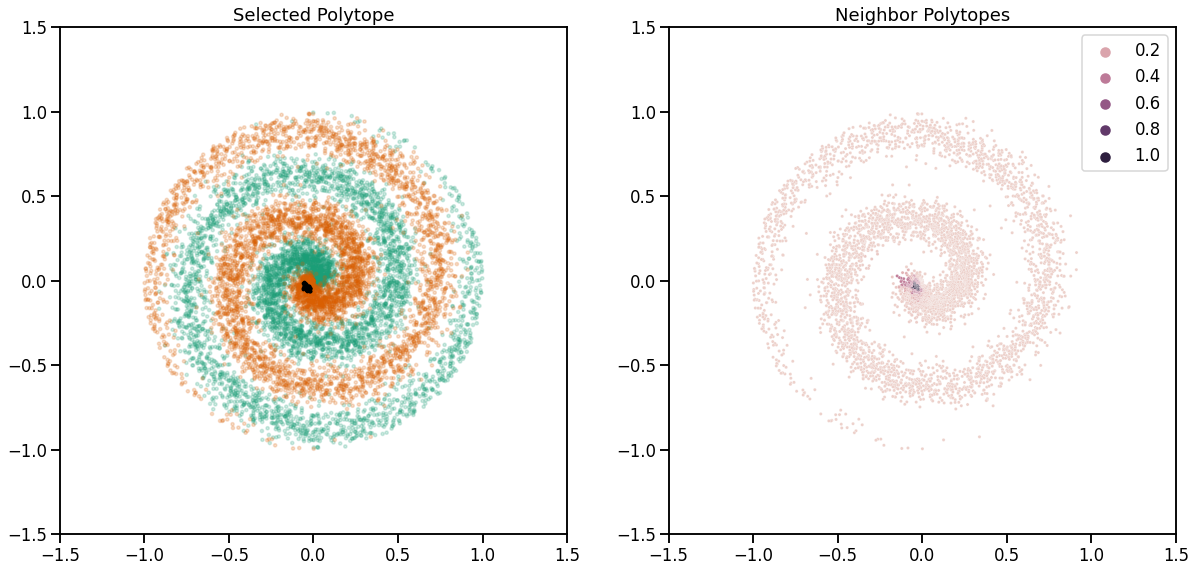

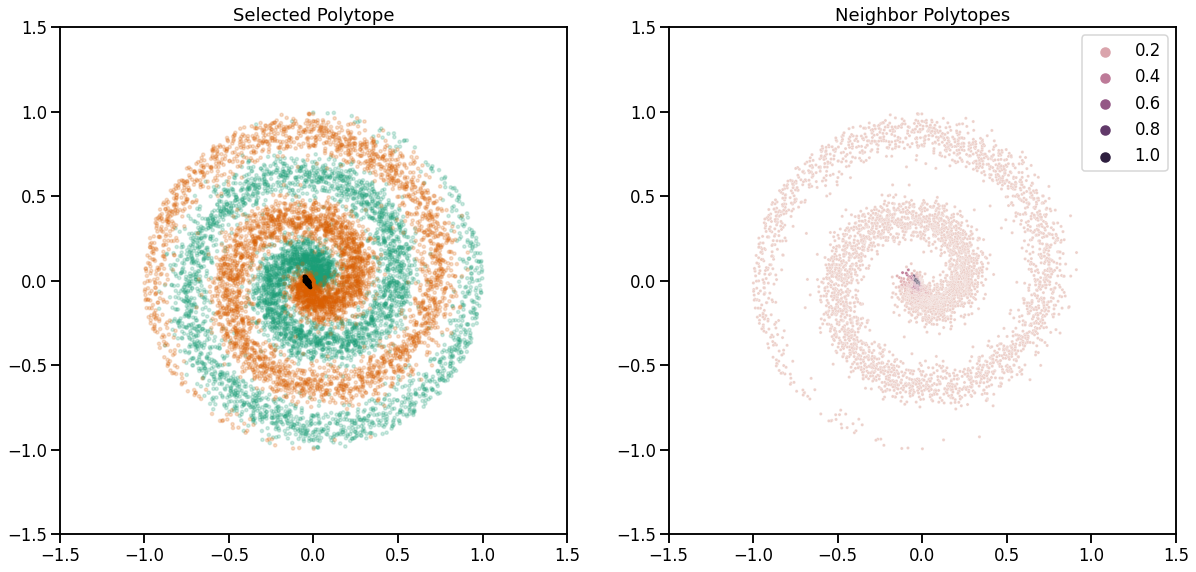

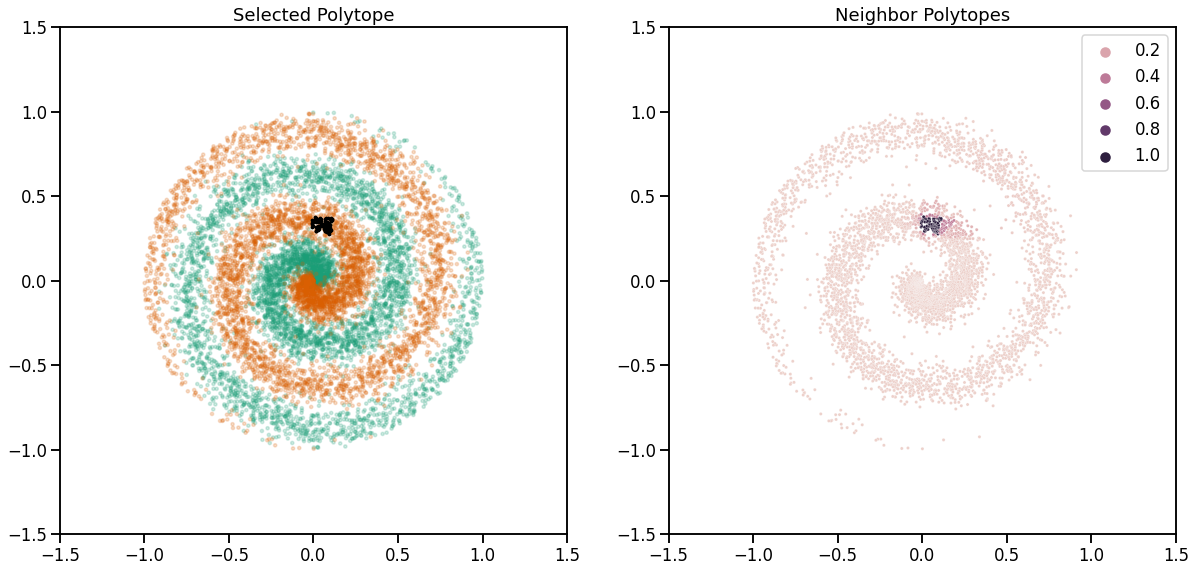

In [29]:
for polytope_id in selected_polytopes[1:4]:
    P_ = X_[polytope_ids == polytope_id]
    scales = compute_weights(X_, polytope_id, 1, network_shape, weights, biases)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 20))

    colors = sns.color_palette("Dark2", n_colors=2)
    clr = [colors[i] for i in y]
    ax[0].scatter(X[:, 0], X[:, 1], c=clr, s=10, alpha=0.2)
    ax[0].scatter(P_[:, 0], P_[:, 1], c='k', s=5, alpha=1)
    ax[0].set_xlim([-1.5, 1.5])
    ax[0].set_ylim([-1.5, 1.5])
    ax[0].set_aspect('equal')
    ax[0].set_title('Selected Polytope')

    sns.scatterplot(x=X_[:, 0], y=X_[:, 1], hue=scales, ax=ax[1], s=10)
    ax[1].set_xlim([-1.5, 1.5])
    ax[1].set_ylim([-1.5, 1.5])
    ax[1].legend()
    ax[1].set_aspect('equal')
    ax[1].set_title('Neighbor Polytopes')

### 2.2 KDN on Spiral Dataset

In this section, we demonstrate the applicability of the global network linearity-based weighting during the training (on spiral dataset) of kernel density networks. We compare the the performance of NNs, KDNs without weighting and KDNs with weighting.

In [30]:
# import KDN class
from kdg.kdn import kdn

Weighting : none
NN accuracy :  0.951
KDN accuracy :  0.895


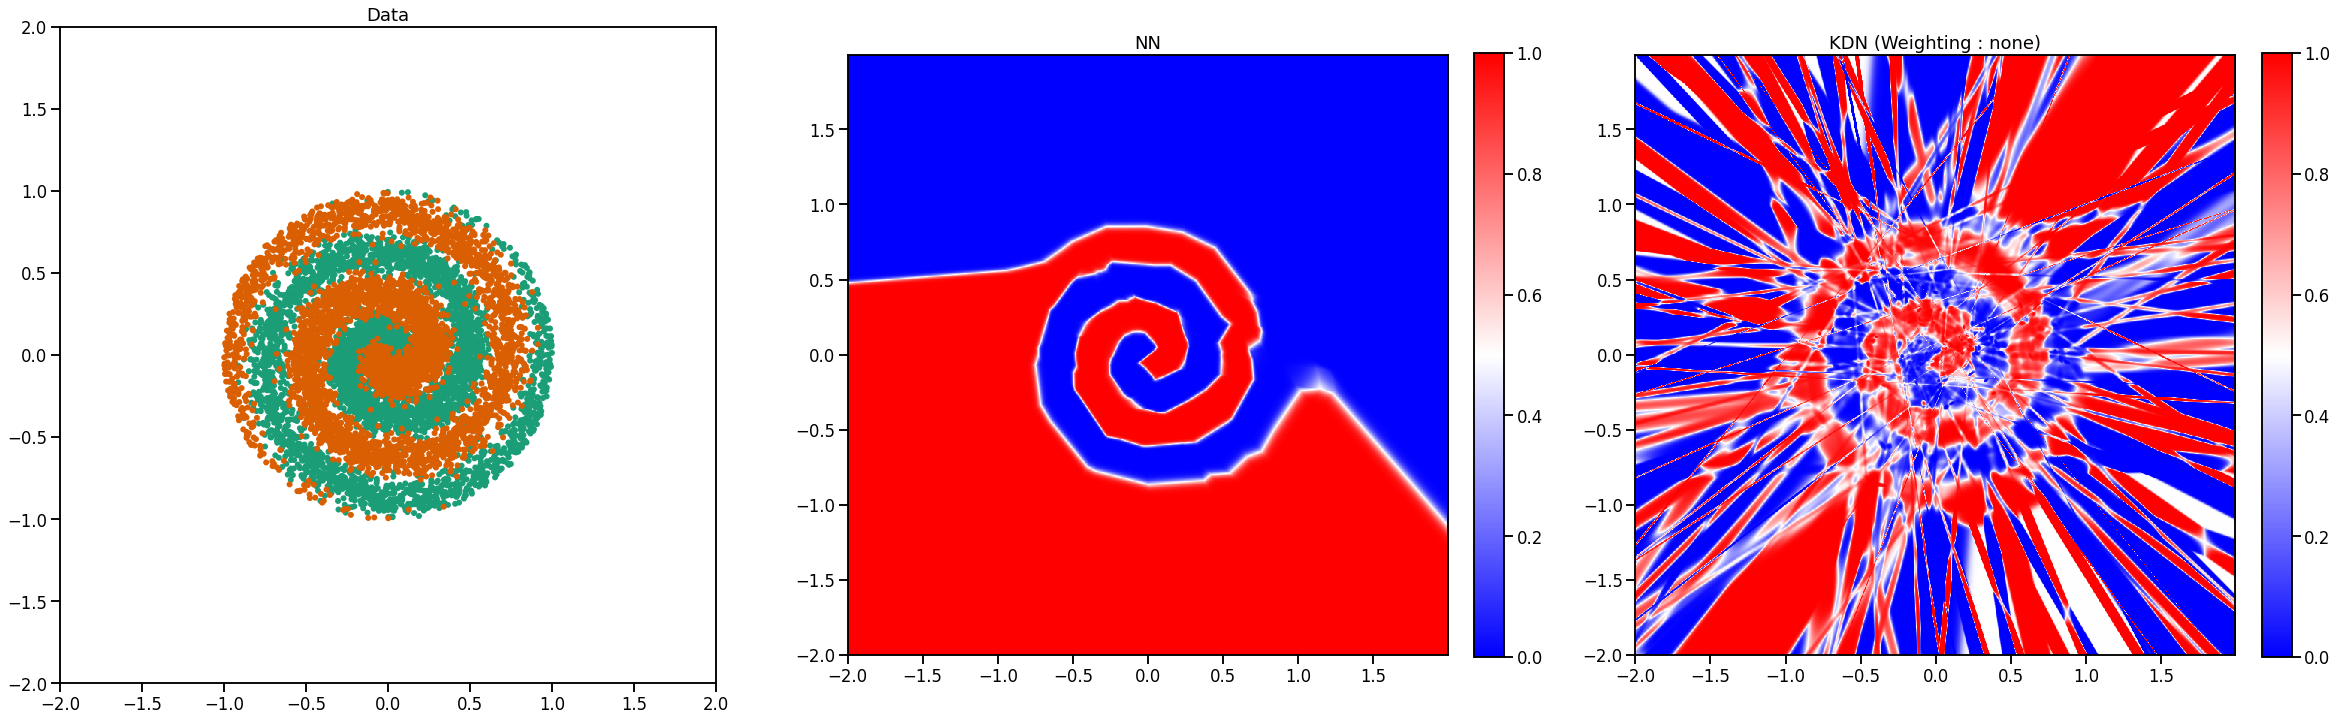

Weighting : lin
NN accuracy :  0.951
KDN accuracy :  0.956


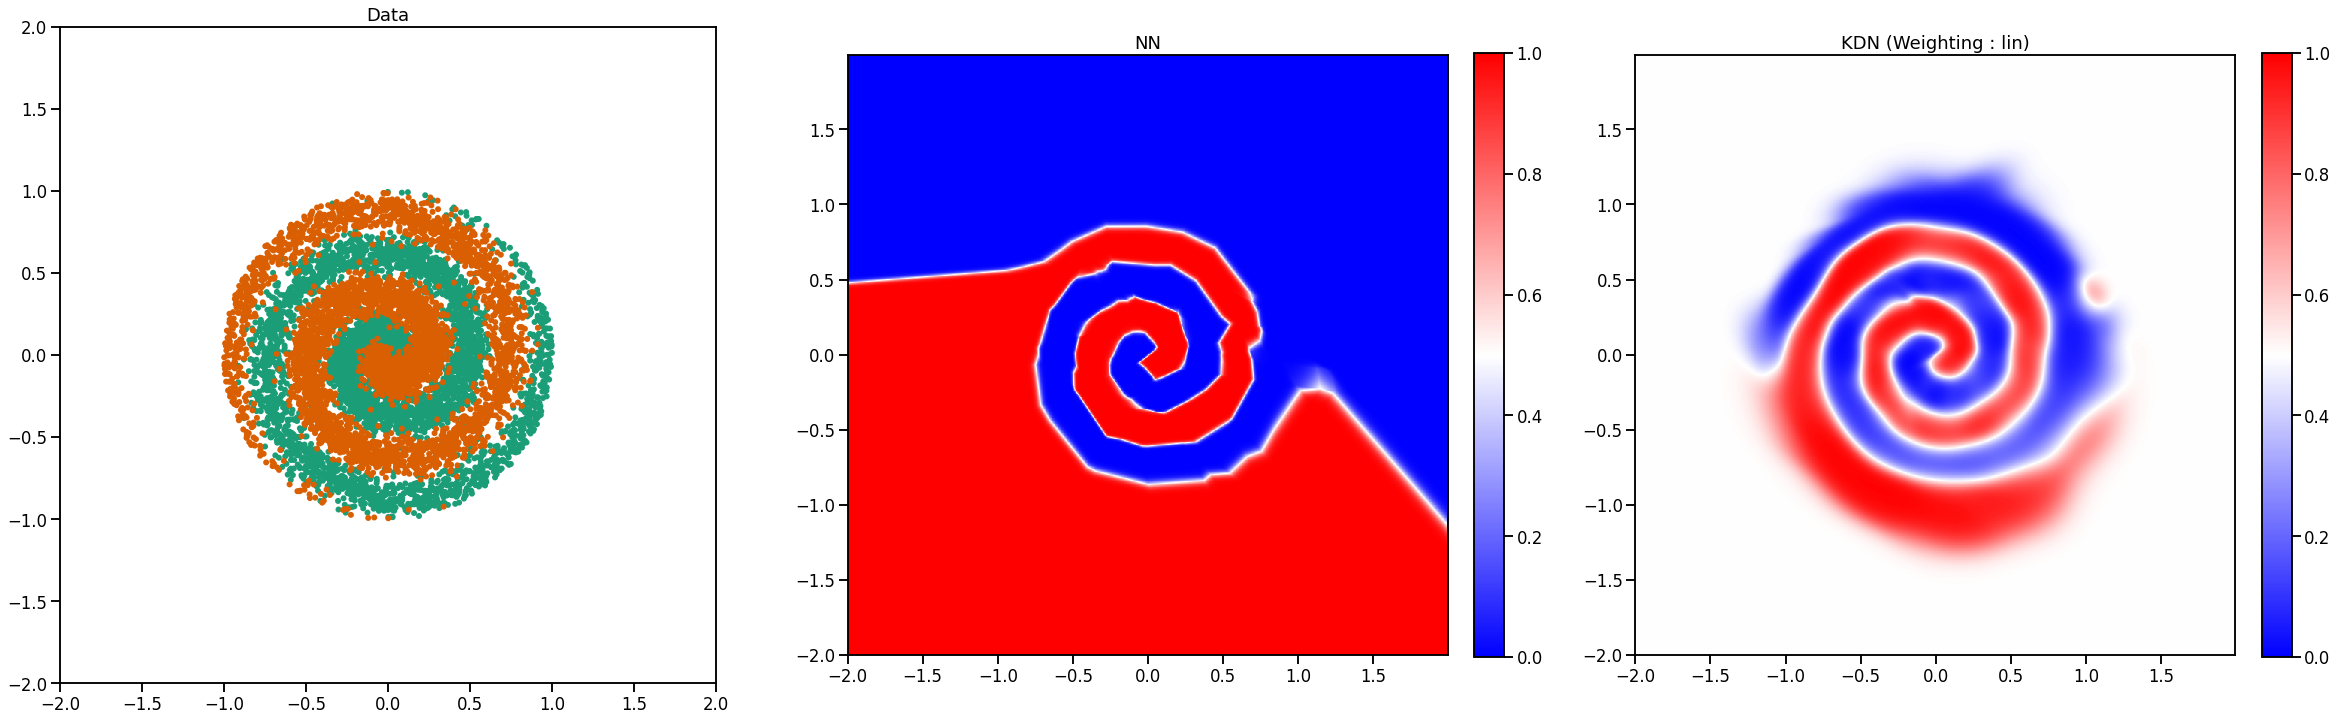

In [31]:
weighting_method = ['none', 'lin']
T = [2, 2]

# define the grid
p = np.arange(-2,2,step=0.005)
q = np.arange(-2,2,step=0.005)
xx, yy = np.meshgrid(p,q)
tmp = np.ones(xx.shape)

grid_samples = np.concatenate(
            (
                xx.reshape(-1,1),
                yy.reshape(-1,1)
            ),
            axis=1
        )    

for i, mode in enumerate(weighting_method):
    print("Weighting : {}".format(mode))
    # fit the KDN
    model_kdn = kdn(network=nn, 
                    k=1e-4,
                    weighting_method=mode,
                    T=T[i],
                    c=1,
                    verbose=False)
    model_kdn.fit(X, y)

    # compute the accuracies
    accuracy_kdn = np.mean(
                model_kdn.predict(X_test) == y_test
                )
    accuracy_nn = np.mean(
                    np.argmax(nn.predict(X_test), axis=1) == y_test
                )

    print("NN accuracy : ", accuracy_nn)
    print("KDN accuracy : ", accuracy_kdn)

    # plot
    proba_kdn = model_kdn.predict_proba(grid_samples)
    proba_nn = model_kdn.predict_proba_nn(grid_samples)

    sns.set_context("talk")
    fig, ax = plt.subplots(1, 3, figsize=(40, 40))

    colors = sns.color_palette("Dark2", n_colors=2)
    clr = [colors[i] for i in y]
    ax[0].scatter(X[:, 0], X[:, 1], c=clr, s=20)
    ax[0].set_xlim(-2, 2)
    ax[0].set_ylim(-2, 2)
    ax[0].set_title('Data')
    ax[0].set_aspect('equal')

    ax1 = ax[1].imshow(proba_nn[:,0].reshape(800, 800).T, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap='bwr', vmin=0, vmax=1, interpolation='nearest', aspect='auto')
    ax[1].set_title('NN')
    ax[1].set_aspect('equal')
    fig.colorbar(ax1, ax=ax[1], fraction=0.046, pad=0.04)

    ax2 = ax[2].imshow(proba_kdn[:,0].reshape(800, 800).T, extent=[xx.min(), xx.max(), yy.min(), yy.max()], cmap='bwr', vmin=0, vmax=1, interpolation='nearest', aspect='auto')
    ax[2].set_title('KDN (Weighting : {})'.format(mode))
    ax[2].set_aspect('equal')
    fig.colorbar(ax2, ax=ax[2], fraction=0.046, pad=0.04)

    plt.show()

### 2.3 KDN on Gaussian Sparse Parity Data

In this section, we demonstrate the applicability of the global network linearity-based weighting during the training (on Gaussian sparse parity dataset) of kernel density networks. We compare the the performance of NNs, KDNs without weighting and KDNs with weighting.

In [4]:
from kdg.utils import gaussian_sparse_parity

In [14]:
p = 20 # total dimensions of the data vector
p_star = 3 # number of signal dimensions of the data vector

sample_size = [1000, 5000, 10000, 50000] # sample size under consideration
n_test = 1000 # test set size
reps = 5 # number of replicates

df = pd.DataFrame()
reps_list = []
accuracy_kdn_lin = []
accuracy_kdn_none = []
accuracy_nn = []
sample_list = []

# create validation set
X_val, y_val = gaussian_sparse_parity(1000)

In [15]:
# NN params
compile_kwargs = {
    "loss": "binary_crossentropy",
    "optimizer": keras.optimizers.Adam(3e-4)
    }
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=False)
fit_kwargs = {
    "epochs": 200,
    "batch_size": 64,
    "verbose": False,
    "validation_data": (X_val, keras.utils.to_categorical(y_val)),
    "callbacks": [callback]
    }

In [16]:
# network architecture
def getNN():
    network_base = keras.Sequential()
    network_base.add(layers.Dense(5, activation='relu', input_shape=(20,)))
    network_base.add(layers.Dense(5, activation='relu'))
    network_base.add(layers.Dense(units=2, activation = 'softmax'))
    network_base.compile(**compile_kwargs)
    return network_base

In [17]:
# run the experiment
for sample in sample_size:
    print('Doing sample %d'%sample)
    for ii in range(reps):
        X, y = gaussian_sparse_parity(
            sample,
            p_star=p_star,
            p=p
        )
        X_test, y_test = gaussian_sparse_parity(
            n_test,
            p_star=p_star,
            p=p
        )

        # train Vanilla NN
        vanilla_nn = getNN()
        vanilla_nn.fit(X, keras.utils.to_categorical(y), **fit_kwargs)

        # train KDN
        model_kdn_lin = kdn(network=vanilla_nn, 
                        polytope_compute_method='all', 
                        k=1e-6,
                        weighting_method='lin',
                        T=2,
                        c=2,
                        verbose=False)
        model_kdn_lin.fit(X, y)

        # train KDN
        model_kdn_none = kdn(network=vanilla_nn, 
                        polytope_compute_method='all', 
                        k=1e-6,
                        weighting_method='none',
                        T=5,
                        c=2,
                        verbose=False)
        model_kdn_none.fit(X, y)

        accuracy_kdn_lin.append(
            np.mean(
                model_kdn_lin.predict(X_test) == y_test
            )
        )
        
        accuracy_kdn_none.append(
            np.mean(
                model_kdn_none.predict(X_test) == y_test
            )
        )

        accuracy_nn.append(
            np.mean(
                np.argmax(vanilla_nn.predict(X_test), axis=1) == y_test
            )
        )
        reps_list.append(ii)
        sample_list.append(sample)

df['accuracy kdn lin'] = accuracy_kdn_lin
df['accuracy kdn none'] = accuracy_kdn_none
df['accuracy nn'] = accuracy_nn
df['reps'] = reps_list
df['sample'] = sample_list


Doing sample 1000
Doing sample 5000
Doing sample 10000
Doing sample 50000


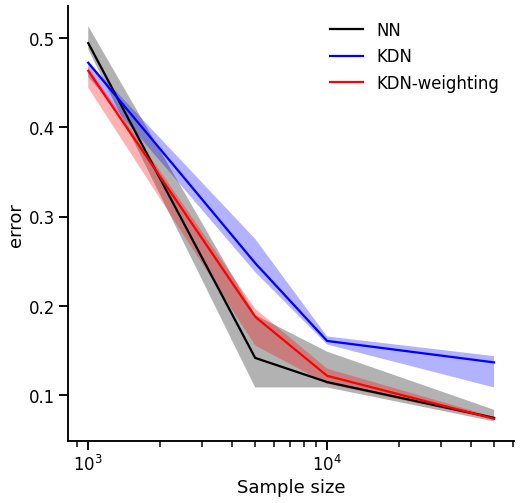

In [18]:
# plot

err_nn_med = []
err_nn_25_quantile = []
err_nn_75_quantile = []

err_kdn_med = []
err_kdn_25_quantile = []
err_kdn_75_quantile = []

err_kdn_lin_med = []
err_kdn_lin_25_quantile = []
err_kdn_lin_75_quantile = []


for sample in sample_size:
    err_nn = 1 - df['accuracy nn'][df['sample']==sample]
    err_kdn = 1 - df['accuracy kdn none'][df['sample']==sample]
    err_kdn_lin = 1 - df['accuracy kdn lin'][df['sample']==sample]

    err_nn_med.append(np.median(err_nn))
    err_nn_25_quantile.append(
            np.quantile(err_nn,[.25])[0]
        )
    err_nn_75_quantile.append(
        np.quantile(err_nn,[.75])[0]
    )

    err_kdn_med.append(np.median(err_kdn))
    err_kdn_25_quantile.append(
            np.quantile(err_kdn,[.25])[0]
        )
    err_kdn_75_quantile.append(
        np.quantile(err_kdn,[.75])[0]
    )

    err_kdn_lin_med.append(np.median(err_kdn_lin))
    err_kdn_lin_25_quantile.append(
            np.quantile(err_kdn_lin,[.25])[0]
        )
    err_kdn_lin_75_quantile.append(
        np.quantile(err_kdn_lin,[.75])[0]
    )

sns.set_context('talk')
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.plot(sample_size, err_nn_med, c="k", label='NN')
ax.fill_between(sample_size, err_nn_25_quantile, err_nn_75_quantile, facecolor='k', alpha=.3)

ax.plot(sample_size, err_kdn_med, c="b", label='KDN')
ax.fill_between(sample_size, err_kdn_25_quantile, err_kdn_75_quantile, facecolor='b', alpha=.3)

ax.plot(sample_size, err_kdn_lin_med, c="r", label='KDN-weighting')
ax.fill_between(sample_size, err_kdn_lin_25_quantile, err_kdn_lin_75_quantile, facecolor='r', alpha=.3)

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_xscale('log')
ax.set_xlabel('Sample size')
ax.set_ylabel('error')
ax.legend(frameon=False)


## References

[1] Collins, Edo, Siavash Arjomand Bigdeli, and Sabine Süsstrunk. "Detecting memorization in ReLU networks." arXiv preprint arXiv:1810.03372 (2018).